# Install and use CPlantBox in 5 minutes + Tutorial to change shoot parameters
In this tutorial, you only need to click the small triangle button on the left top corner of the code blocks.
## 1. Install CPlantBox on Google Colab or local linux
* The source code of CPlantBox is always published on GitHub, here we can download them (git clone) from github
* Some script are prepare in the following block, run them to download then install it (build it on Colab)



In [52]:
#<---Click this triangle to load python libraries
# loading other python library or packages. Only need to run once at the start.
import sys
import datetime
import matplotlib.pylab as plt
import numpy as np
import timeit
import os
import plotly
import os
import math
import plotly.graph_objects as go
import xml.etree.ElementTree as ET
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from plotly.subplots import make_subplots
!pip3 install vtk
from vtk.util import numpy_support as VN
import vtk

  Using cached https://files.pythonhosted.org/packages/22/f5/30e11e1ad21701e1cd185b046979107930419a74a5602c6b899dc8523fe4/vtk-8.1.2-cp36-cp36m-manylinux1_x86_64.whl


In [ ]:
#<---Click this triangle inside the round circle to download the CPlantBox
! git clone https://github.com/Plant-Root-Soil-Interactions-Modelling/CPlantBox # downloading the source code
os.chdir("/content/CPlantBox") # change directory
!cmake . # Run Cmake, creating compiling files
!make # Complie the code to make it runable
os.chdir("/content/CPlantBox/tutorial/jupyter") # Change to the python directory (working directory)
# Congrats! Now you are ready to use the CPlantBox

# optional in case an update is just pushed to the repository
#! git pull # update the file comparing to github repository

In [53]:

# Loading specific python scripts for CPlantBox and CRootBox
import py_plantbox as pb #CPlantBox Python Binding
from rb_tools import * # CRootBox nodes Conversion tools
from CPlantBox_PiafMunch import *
plotly.__version__
# If not all of them are installed, run the following blocks to install them, and rerun this block
# Otherwise skip the next block


'4.1.1'

In [ ]:
# optional, if you are using the Google Colab, then those packages are already installed.
# !pip3 install plotly==4 # specific for Google colab, where the stock version is 3.6
# !pip3 install matplotlib
# !pip3 install numpy
# If any of those are newly installed, rerun the first block

## 2. Creating a plant as python object

In [54]:
# Run CPlantBox base on what kind of plant you want to create
# Run CPlantBox
name = "Heliantus_Pagès_2013" # parameter name
# here are some optional parameters to be tested
MG7m = "morning_glory_7m" # Simulate a 7 meter morning glory
# Canola = 'Brassica_napus_a_Leitner_2010_test'
# Test = "test_nodes" # Simulate a 2.5 meter morning glory
# MG3.5m = "morning_glory_3.5m_d" # Simulate a 3.5 meter morning glory
# 9m_MG = "morning_glory_9m_d" # Simulate a 9 meter morning glory
# 10m_MG = "morning_glory_10m_d" # Simulate a 10 meter morning glory
# 14m_MG = "morning_glory_14m_d" #Simulate a 14 meter morning glory
time = 76 # how many days the plant need to grow
# arguments are (input parameter name, growing time of the plant, ouput name in path CPlantBox/result/)
plant1 = CPlantBox(name, time, name) # make a plant object in python

## 3. Visualize the plant 
There are many ways to visualize the plant, we can use R, Python matplotlab, matlab, plotly, Paraview, VTK.... 
In a jupyternotebook, we can use ploltly or vtk+matplotlab.
### 3.1 Visualization through plot.ly
The next block is a interactive visualization by using plotly (fit plants has less than 10000 segments, for larger plants we recommend paraview or VTK)

In [55]:
# first we create a Heliantus plant
name = "Heliantus_Pagès_2013" # parameter name
# here are some optional parameters to be tested
# name = "PMA2018" # Simulate a small plant with 3 leaves and two lateral root, you can comment the heliantus line and uncomment this line to see what happend.
time = 70 # how many days the plant need to grow, make it smaller, for example 15 to see if the plant becomes smaller

plant1 = CPlantBox(name, time, name) # make a plant object in python
# Visualization
def visual_plant_sub(plant1,name='plant'):
    nodes_cor = python_nodes(plant1) # use the object name created previously to get its coordinates
    fig= go.Scatter3d(
        x=nodes_cor.T[3],
        y=nodes_cor.T[4],
        z=nodes_cor.T[5],
        mode='markers',
        marker=dict(
            size=3,
            color=nodes_cor.T[1],                # nodes_cor.T[1] is organ type, nodes_cor.T[2] is the connection number of a node 
            colorscale=[[0, "wheat"], #color of the root, change it to "yellow" to see the difference
                    [0.5, "darkgreen"],
                    [1.0, "lightgreen"],],  opacity=0.8
        ), name =name
    )

    return fig
   

def visual_plant(plant1):
    subfig = visual_plant_sub(plant1)
    fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'surface'}]])
    fig.add_trace(subfig) 
    fig.update_layout(scene_aspectmode='data',)
    return fig

fig = visual_plant(plant1)
fig.show()



### 3.2 Visualization through Matplotlib + VTK




Text(0.7615384615384615, 0.47434782608695647, 'Leaf Arrangements')

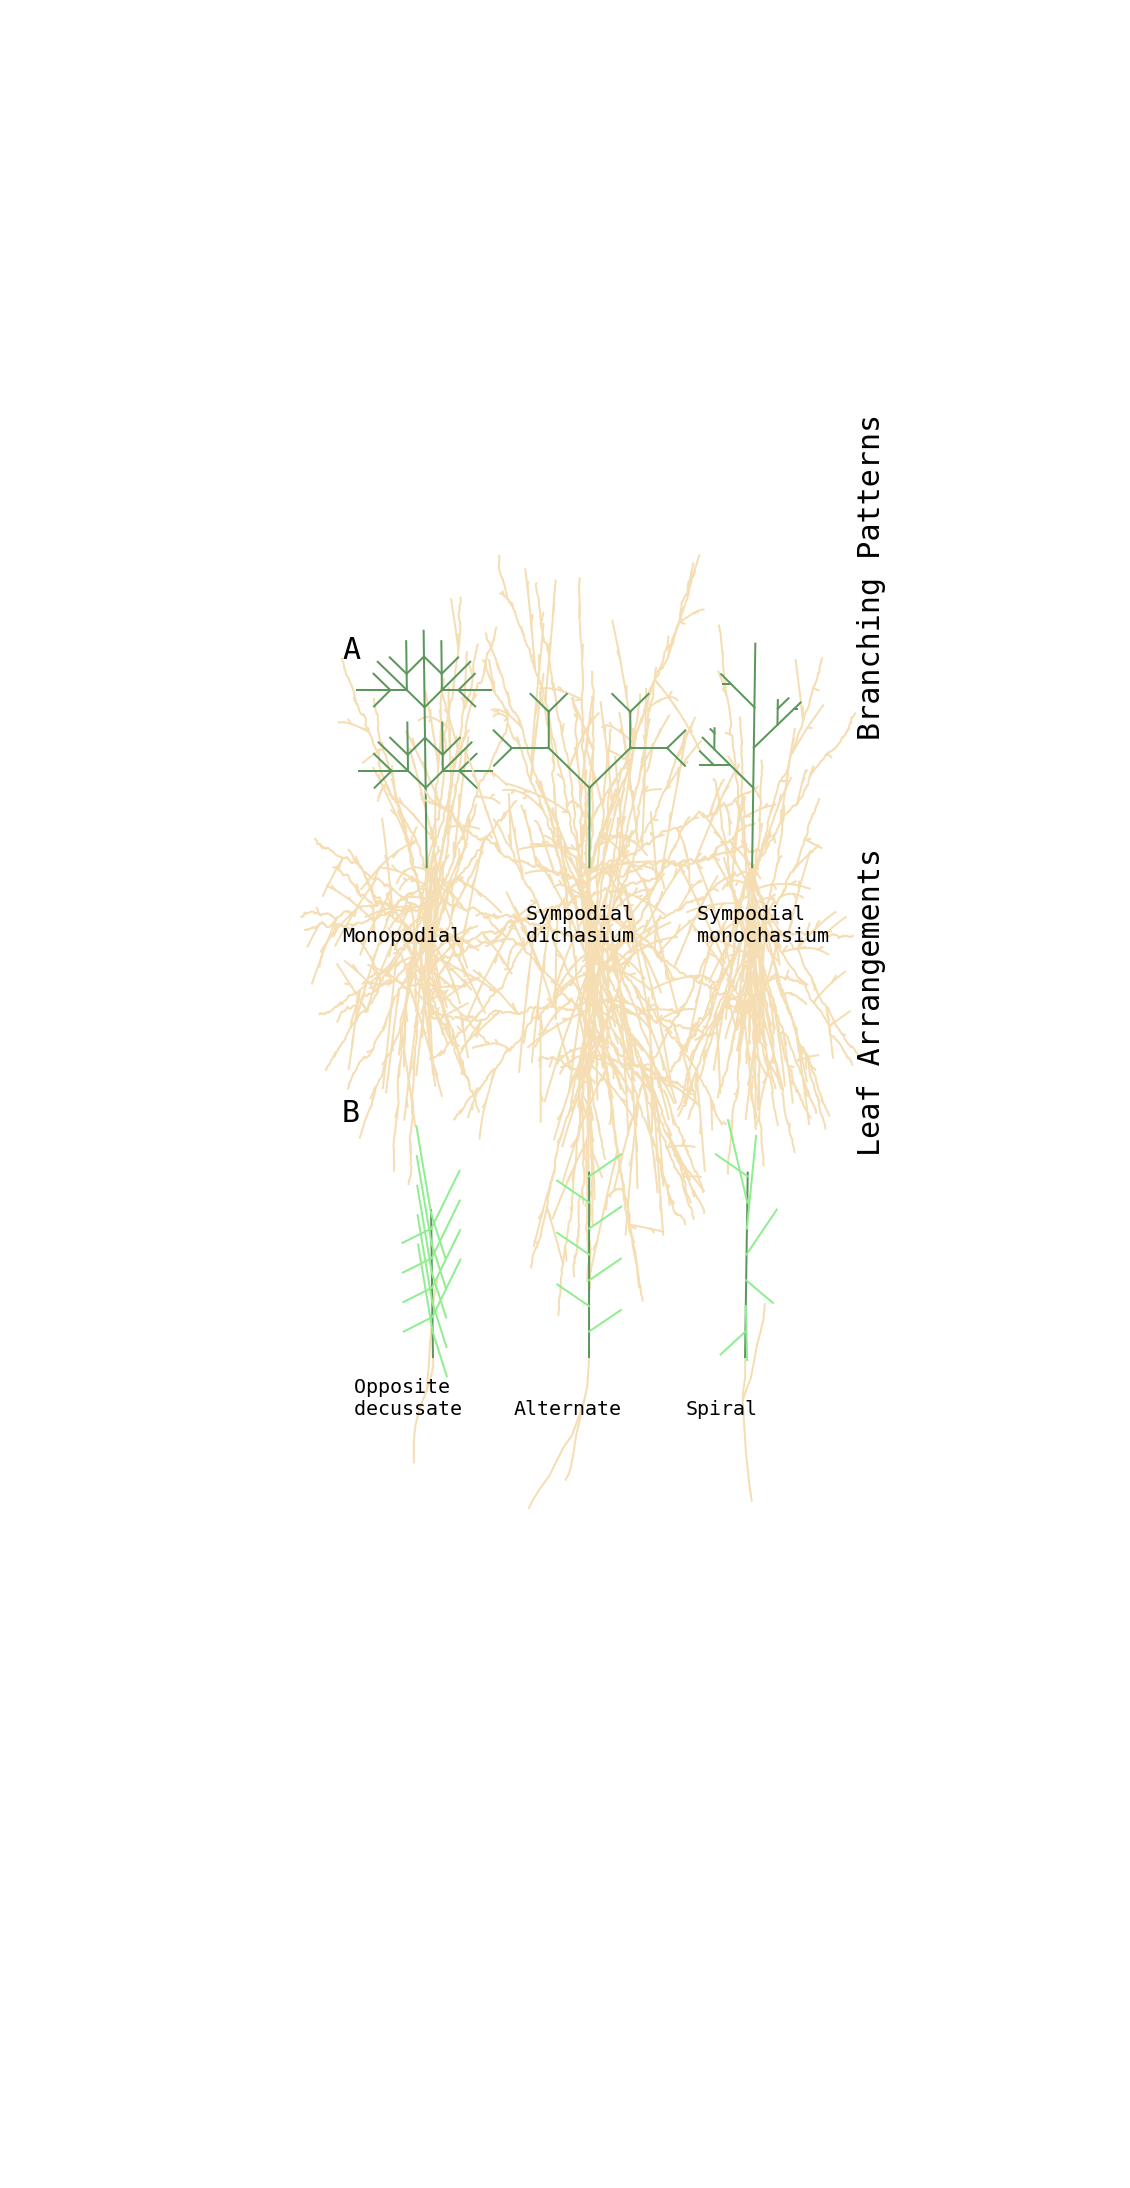

In [12]:
#CPlantBox("monopodial",120, "monopodial")
#CPlantBox("sympodial_dichasium",180, "sympodial_dichasium")
CPlantBox("sympodial_monochasium",110, "sympodial_monochasium")
#CPlantBox("leaf_opposite_decussate",180, "leaf_opposite_decussate")
#CPlantBox("leaf_alternate",180, "leaf_alternate")
#CPlantBox("leaf_spiral",180, "leaf_spiral")
h_font = {'fontname':'DejaVu Sans Mono'}
def plot_vtp(name, indentx, indentz,scale , title, oren):
    reader = vtk.vtkXMLPolyDataReader()
    path = "../results/{}.vtp".format(name) #path or name of the vtp output
    reader.SetFileName(path)
    reader.Update()
    polydata = reader.GetOutput()
    vtk_organtype = VN.vtk_to_numpy(reader.GetOutput().GetCellData().GetArray("organtype"))
    vtk_id = VN.vtk_to_numpy(reader.GetOutput().GetCellData().GetArray("id"))
    #vtk_time = VN.vtk_to_numpy(reader.GetOutput().GetPointData().GetArray("time"))
    vtk_cor = VN.vtk_to_numpy(reader.GetOutput().GetPoints().GetData())
    vtk_line = VN.vtk_to_numpy(reader.GetOutput().GetLines().GetData())
# print(vtk_organtype,"\n",vtk_id)
    ax.text2D(indentx/13 +0.3, indentz/23+0.57, title,rotation=0 , transform=ax.transAxes, size=20,**h_font)
#     ax.set_xlim3d(-0.2,0.2)
    for i in range(polydata.GetNumberOfCells()):
        pts = polydata.GetCell(i).GetPoints()
        
        np_pts = np.array([pts.GetPoint(i) for i in range(pts.GetNumberOfPoints())])
        x = [ (n)*scale+indentx-1 for n in np_pts[:,0]/100]
        
        z = [ (n)*scale+indentz for n in np_pts[:,2]/100]

        y = [ n*scale for n in np_pts[:,1]/100]
        ax.plot3D(x,y,z, c= get_organ_color(vtk_organtype[i]) ,linewidth=2)

def get_organ_color(i):
    if i == 2:
        return "wheat"
    elif i == 4:
        return "#5b965b"
    elif i == 8:
        return "lightgreen"
    else:
        return "black";
   

#name = "sympodial_dichasium"
plt.rcParams['figure.figsize'] = [20, 40]
fig = plt.figure("Stem Branching and Leaf Arrangements")
fig.patch.set_alpha(0.)
fig.subplots_adjust(hspace=0, wspace=0)
ax = fig.add_subplot(int("11{}".format(1)), projection='3d')
#plt.axis('image')

plt.title("")
plt.axis('off')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.view_init(45, 270)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

#ax.set_ylim3d(0,2)
#ax.set_zlim3d(-1.5,0.5)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.grid(False)
plot_vtp("monopodial",0,0,1,"Monopodial",1)

plot_vtp("sympodial_dichasium",2,0,1," Sympodial \n dichasium",1)
plot_vtp("sympodial_monochasium",4,0,1," Sympodial \n monochasium",0.5)


plot_vtp("leaf_opposite_decussate",0,-5,50, " Opposite\n decussate",1)
plot_vtp("leaf_alternate",2,-5,50, "Alternate",1)
plot_vtp("leaf_spiral",4,-5,50, "Spiral" ,-1)
ax.text2D(0/13 +0.3, 3/23+0.57, "A",rotation=0 , transform=ax.transAxes, size=30, **h_font)
ax.text2D(0/13 +0.3, -1.9/23+0.57, "B",rotation=0 , transform=ax.transAxes, size=30, **h_font)

ax.text2D(6/13 +0.3, 2.2/23+0.57, "Branching Patterns",rotation=90 , transform=ax.transAxes, size=30, **h_font)
ax.text2D(6/13 +0.3, -2.2/23+0.57, "Leaf Arrangements",rotation=90 , transform=ax.transAxes, size=30, **h_font)


## 4. Coupling with PiafMunch
### 4.1 Creating PiafMunch input parameter

In [56]:
from CPlantBox_PiafMunch import *
MG7m = "PMA2018" # Simulate a 7 meter morning glory
time=80
# Write PiafMunch input parameter file 
plant = CPlantBox(MG7m, time, MG7m) # simulate the plant
dict_all = convert(plant)  # get the output of the plant
create_piafmunch_parameter = write_PiafMunch_parameter(dict_all['connection'], dict_all['organtype'], dict_all['resistance'], dict_all['unqiue']) # get the returned function
create_piafmunch_parameter( dict_all['unqiue'], name= "mg_low1.ini" , end_time = "100" ) # call the returned parameter generation function

output successful


### 4.2. Visualization of PiafMunch Output
* Read parameter files


In [57]:
path = 'PMA_output.txt'
output = pd.read_table(path,sep='\t',header=1)
node_connection =dict_all['connection']
x = np.array(output.iloc[:,0])
##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])




/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 703 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 541 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 1027 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 811 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1729 we can find Q_ST (mmol)[ 1]
the end is Q_ParApo (mmol)[ 1]
at Nr. 163 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1996 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[53] 
at Nr. 1890 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[53]
at Nr. 1837 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[53]


<Figure size 2000x2000 with 0 Axes>

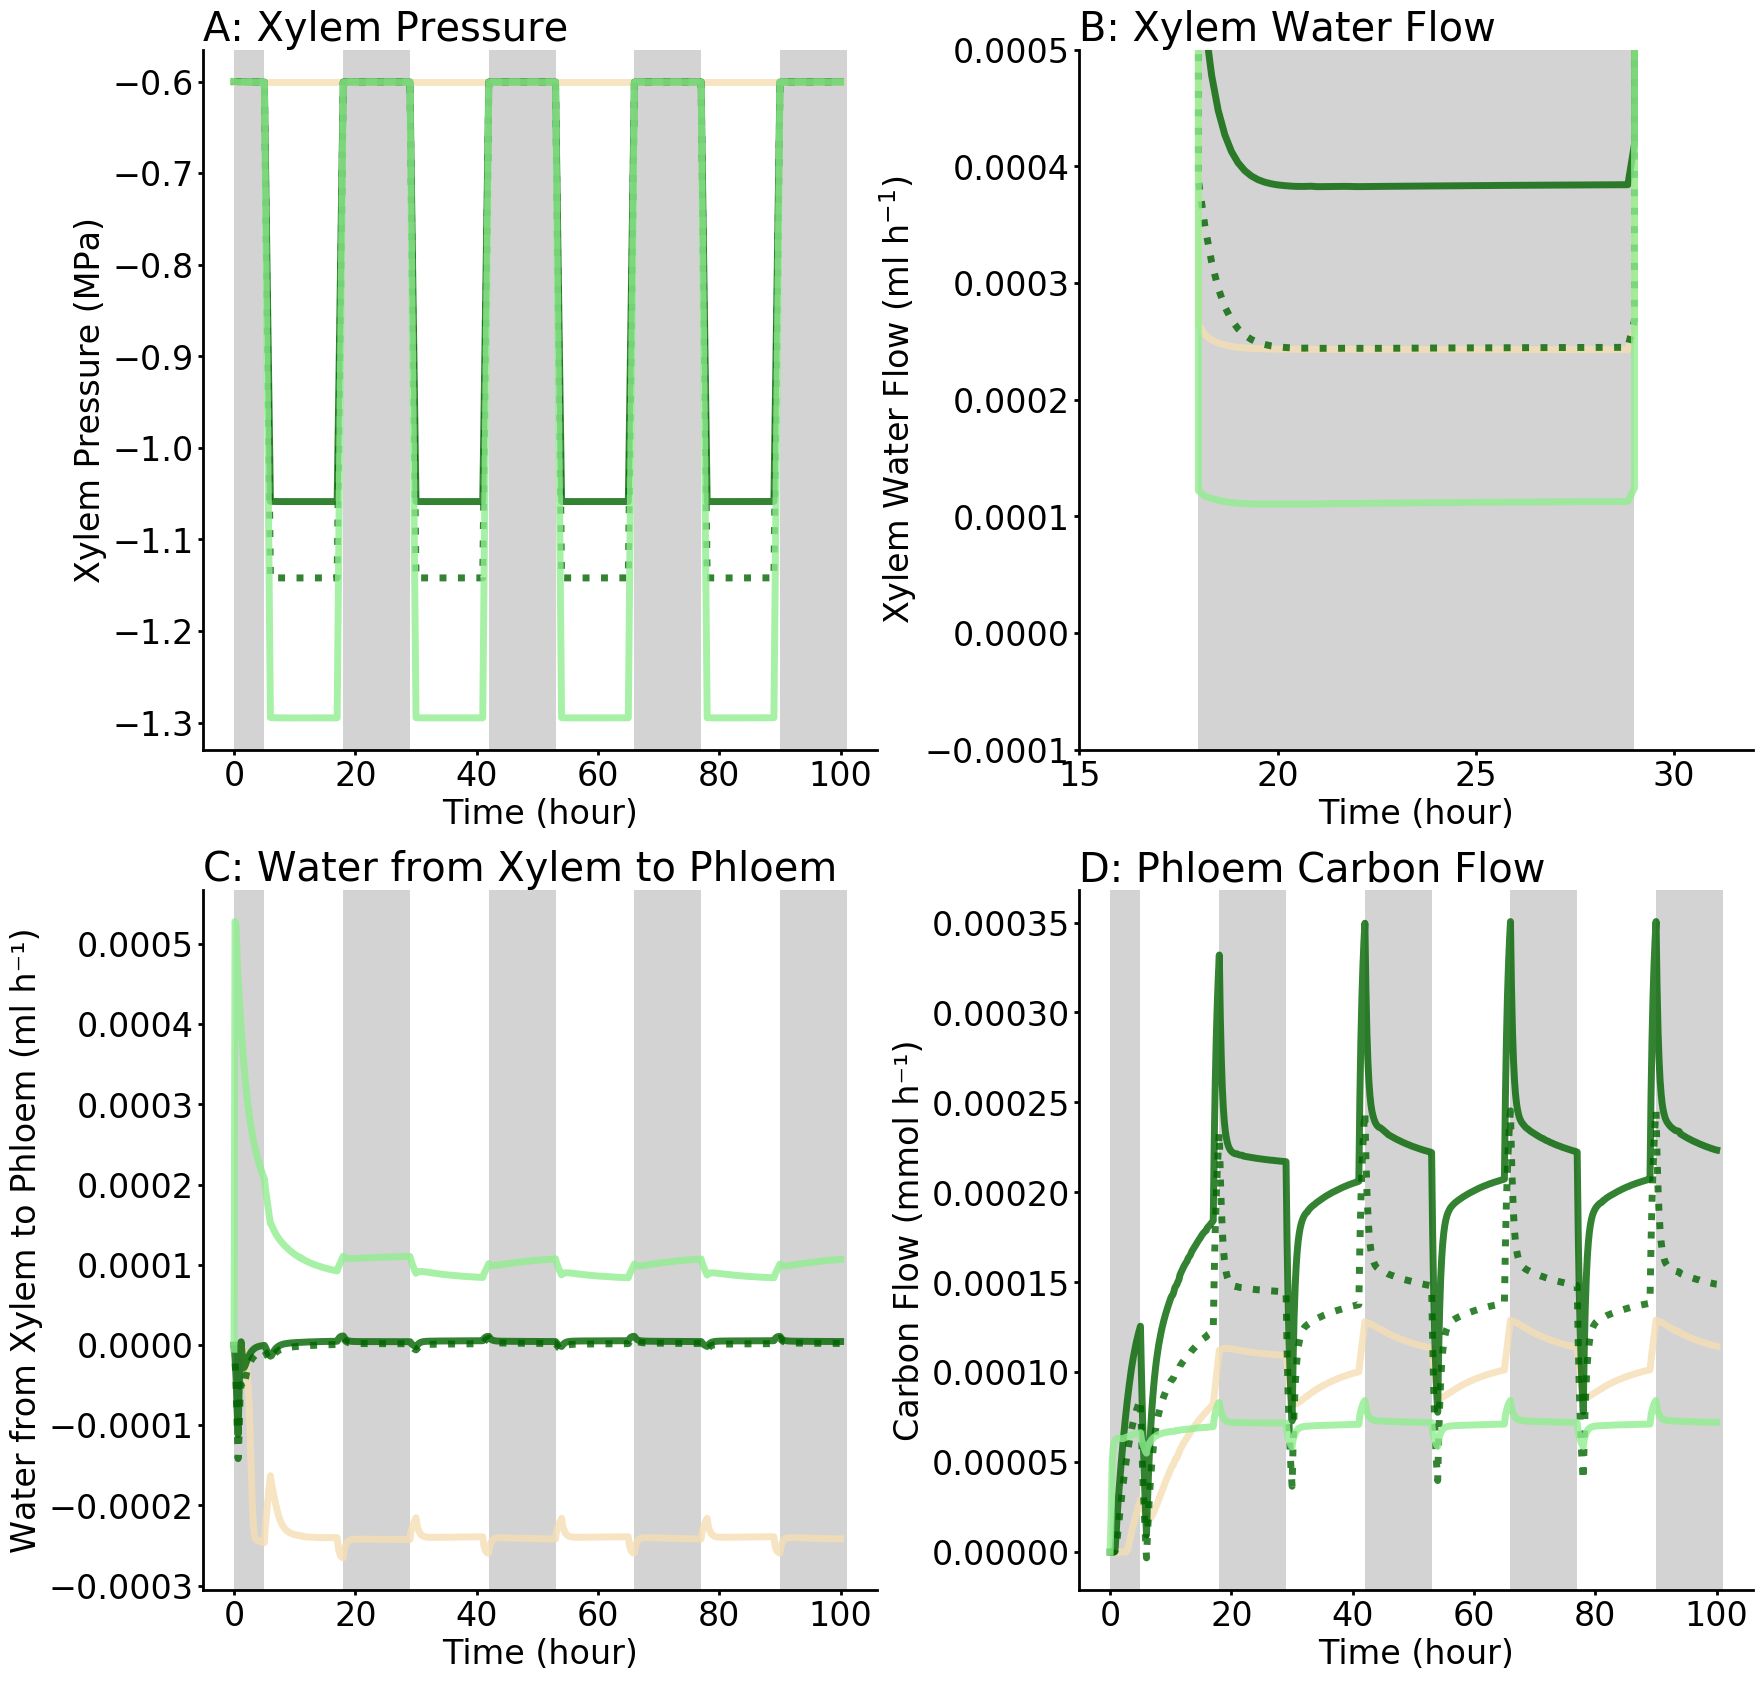

In [58]:
plt.style.use('default')

def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem\n between\n two\n leaves')
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})
import numpy as np
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)
dict_all = CPlantBox_PiafMunch('PMA2018', 80, 'PMA2018')
node_connection = dict_all['connection']
nodes_organtype = dict_all['organtype']
def organ_color(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'wheat'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'darkgreen'
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        
plt.style.use('default')
x=np.array(output.iloc[:,0])
lable_size=16
title_size =24

def line_style(int): #set line style in the plot figure
    if  i ==34 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem\n between\n two\n leaves')


csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})
import numpy as np
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 

all_marker_1 =[20, 23, 34, 53]
    
def organ_color(int):
    if i == 53: #int is source 
        return 'lightgreen'
    elif i == 20: #int is sink
        return 'wheat'
    elif i == 23 or i == 34:
        return 'darkgreen'
    else:
        return 'None'    

def organ_color_n(int):
    if i == 53: #int is source 
        return 'lightgreen'
    elif i == 20: #int is sink
        return 'wheat'
    elif i == 23 or i == 34:
        return 'darkgreen'
    else:
        return 'None'       
time = np.array(output.iloc[:, 0])

ax = plt.subplot(221)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Pressure (MPa)", color='black')

plt.title("A: Xylem Pressure", color='black' ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_marker_1:
    ax.plot(x,[pt[i] for pt in P_Xyl], linewidth=5
                ,c=organ_color(i),alpha=0.8,zorder=0, ls = line_style(i))
add_day_night()








ax = plt.subplot(222)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
plt.title("B: Xylem Water Flow".format(i ,output.columns[n_begin]),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_marker_1:
    ax.plot(x,JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5
                ,c=organ_color(i),alpha=0.8,zorder=0, ls = line_style(i))
plt.ylim((-0.0001, 0.0005))
plt.xlim((15, 32))
add_day_night()


ax = plt.subplot(223)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)", **hfont)
plt.ylabel('Water from Xylem to Phloem (ml h⁻¹)', color='black')
plt.title('C: Water from Xylem to Phloem', color='black', loc="left")  
for i in all_marker_1:
        ax.plot(x,[pt[i] for pt in JW_Trsv], linewidth=5,
                c=organ_color_n(i),alpha=0.8, ls = line_style(i))
add_day_night()


ax = plt.subplot(224)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)


plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)', color='black')
 
plt.title('D: Phloem Carbon Flow', color='black',loc="left")  
for i in all_marker_1:
    ax.plot(x,JS_ST.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5
                ,c=organ_color(i),alpha=0.8,zorder=0, ls = line_style(i))
add_day_night()



plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')

## 5. Read and write parameter files.
1. CPlantBox use XML file to parameterize the plant, the file could be a little bit scarry at first glance. However, here I will give you examples to try each parameter. In this way you will know all the parameters quickly.
Firstly, we print out all the parameters:

In [60]:
# check parameters in xml files
name= "PMA2018" #name of the small plant
all_parameter = ET.parse("../../modelparameter/{}.xml".format(name)) # read the parameter file from xml file
plant_parameter = all_parameter.getroot() # get the first level of parameters
parameter_options={}
parameter_order = 0
for organ in plant_parameter.iter('organ'): 
    list=[]
    print(organ.attrib ) # print of parameters
    
    for parameter in organ.iter('parameter'): 
        
        print(parameter.attrib)
        
        list.append(parameter.attrib['name']) 
        parameter_order = parameter_order+1
    print("\n" )
    parameter_options[organ.attrib['type']+organ.attrib['subType']] = list



{'type': 'seed', 'subType': '0'}
{'name': 'seedPos.x', 'value': '0'}
{'name': 'seedPos.y', 'value': '0'}
{'name': 'seedPos.z', 'value': '-3'}
{'name': 'plantingdepth', 'value': '3'}
{'name': 'firstB', 'value': '0', 'dev': '0'}
{'name': 'delayB', 'value': '0', 'dev': '0'}
{'name': 'maxB', 'value': '0', 'dev': '0'}
{'name': 'nC', 'value': '2'}
{'name': 'nz', 'value': '0'}
{'name': 'firstSB', 'value': '14', 'dev': '0'}
{'name': 'delaySB', 'value': '0', 'dev': '0'}
{'name': 'delayRC', 'value': '7', 'dev': '0'}
{'name': 'simulationTime', 'value': '56', 'dev': '0'}


{'type': 'root', 'name': 'taproot', 'subType': '1'}
{'name': 'lb', 'value': '1', 'dev': '0'}
{'name': 'la', 'value': '2', 'dev': '0'}
{'name': 'ln', 'value': '3', 'dev': '0'}
{'name': 'lmax', 'value': '4.0999999999999996', 'dev': '0'}
{'name': 'nob', 'value': '1.3666666666666665', 'dev': '0'}
{'name': 'r', 'value': '4.5', 'dev': '0.45000000000000001'}
{'name': 'a', 'value': '0.20000000000000001', 'dev': '0.02'}
{'name': 'RotBeta

In [61]:
# here we show what is the plant simulated based on those parameters
name= "PMA2018"
time = 90
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

## 6. Change the length of the Stem
### 6.1 lmax: the maximal length
Length is controled by six parameters, among them, the maximal length is controled by lmax. if we only change the lmax, the growth will only depends on the time. Lets see what will happend if we only change the lmax of the main stem:

In [62]:

def change_parameter(input_name, output_name, organ_name, subtype , parameter_name, value_type, value):   
    all_parameter = ET.parse("../../modelparameter/{}.xml".format(input_name)) # read the parameter file from xml file
    plant_parameter = all_parameter.getroot() # get the first level of parameters
    original_lmax = plant_parameter.find("./organ[@type='{}'][@subType='{}']/parameter[@name='{}']".format(organ_name, subtype, parameter_name)).get('{}'.format(value_type)) # get function to read the value
    # The '10' in the following line is the value that need to be changed change the value
    plant_parameter.find("./organ[@type='{}'][@subType='{}']/parameter[@name='{}']".format(organ_name, subtype, parameter_name)).set('{}'.format(value_type),'{}'.format(value)) # set function to read the value
    current_lmax = plant_parameter.find("./organ[@type='{}'][@subType='{}']/parameter[@name='{}']".format(organ_name, subtype, parameter_name)).get('{}'.format(value_type)) # get function to read the value
    print('original {} of {} organ with subtype {} is {}, changed to {}'.format(parameter_name, organ_name, subtype ,original_lmax, current_lmax))
    all_parameter.write('../../modelparameter/{}.xml'.format(output_name))
change_parameter('PMA2018', 'testXML', 'stem', '1', 'lmax', 'value','10')
name = 'testXML'
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()
# Try to change the "10" to 5
change_parameter('PMA2018', 'testXML', 'stem', '1', 'lmax', 'value','5')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

original lmax of stem organ with subtype 1 is 2.1, changed to 10


original lmax of stem organ with subtype 1 is 2.1, changed to 5


### 5.2 lb, ln and la: the parameters controls branching
In the previous section, you may notice that, with the increase of the lmax, the length of the main stem increased. But with the increase length of the stem, we also get more leaves. Is it possible to reduce the leaf numbers? There are two ways, first, we could change the lb, lb is the length at bottom without any branching.

In [63]:
# change lb to 3 based on the testXML created in last section
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'lb', 'value','3')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()
# now there is 3 branches again

original lb of stem organ with subtype 1 is 0.7, changed to 3


In [64]:
# change lb to 3 based on the testXML created in last section
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'lb', 'value','3')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()
# now there is 3 branches again

original lb of stem organ with subtype 1 is 3, changed to 3


### 5.2.2 Let's change the ln to see what will happen?
ln is the internode distance

In [65]:
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'value','0.3')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

original ln of stem organ with subtype 1 is 0.7, changed to 0.3


### 5.2.2Let's change the la to see what will happen?
la is the stem top without branches

In [66]:
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'la', 'value','2')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

original la of stem organ with subtype 1 is 0, changed to 2


In [67]:
# in addition, the functiontype decides what branching internode distance will be
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','1')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

original ln of stem organ with subtype 1 is 0, changed to 1


In [68]:

fig = make_subplots(
    rows=3, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'lmax', 'value','20')
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','1')
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','0')
smallplant1 = CPlantBox(name, time, name) # make a plant object in python
fig1 = visual_plant_sub(smallplant1,name="functiontype 0")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','1')
smallplant2 = CPlantBox(name, time, name) # make a plant object in python
fig2 = visual_plant_sub(smallplant2,name="functiontype 1")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','2')
smallplant3 = CPlantBox(name, time, name) # make a plant object in python
fig3 = visual_plant_sub(smallplant3,name="functiontype 2")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','3')
smallplant4 = CPlantBox(name, time, name) # make a plant object in python
fig4 = visual_plant_sub(smallplant4,name="functiontype 3")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','2')
smallplant5 = CPlantBox(name, time, name) # make a plant object in python
fig5 = visual_plant_sub(smallplant3,name="functiontype 4")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','3')
smallplant6 = CPlantBox(name, time, name) # make a plant object in python
fig6 = visual_plant_sub(smallplant4,name="functiontype 5")

fig.add_trace(fig1, 1, 1 )
fig.add_trace(fig2, 1, 2)
fig.add_trace(fig3, 2, 1)
fig.add_trace(fig4, 2, 2)
fig.add_trace(fig5, 3, 1)
fig.add_trace(fig6, 3, 2)

fig.update_layout(
    title_text='different RotBeta (function type)',
    height=800,
    width=800
)

fig.show()

original lmax of stem organ with subtype 1 is 5, changed to 20
original RotBeta of leaf organ with subtype 2 is 1, changed to 1
original ln of stem organ with subtype 1 is 1, changed to 0
original ln of stem organ with subtype 1 is 0, changed to 1
original ln of stem organ with subtype 1 is 1, changed to 2
original ln of stem organ with subtype 1 is 2, changed to 3
original ln of stem organ with subtype 1 is 3, changed to 2
original ln of stem organ with subtype 1 is 2, changed to 3


## 6. Change the rotation of the Stem
### Rotation Theta (rotaBeta) : the angle between main stem and sub branch
### Rotation Beta (rotaBeta) : the angle between two neigbour sub branch
the value of Rotation multiply by Pie is the revlution of the neighbouring sub branch.

In [70]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'lmax', 'value','20')
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','0')
smallplant1 = CPlantBox(name, time, name) # make a plant object in python
fig1 = visual_plant_sub(smallplant1,name="0 degree rotation") # every two neighbouring branch is 0 degree

name = 'testXML'
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','0.166666') # the rotation angle is equal to 180*0.166666 
smallplant2 = CPlantBox(name, time, name) # make a plant object in python
fig2 = visual_plant_sub(smallplant2,name="30 degree rotation") # every two neighbouring branch is 30 degree

name = 'testXML'
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','0.5') # the rotation angle is equal to 180*0.5 
smallplant3 = CPlantBox(name, time, name) # make a plant object in python
fig3 = visual_plant_sub(smallplant3,name="90 degree rotation") # every two neighbouring branch is 90 degree

name = 'testXML'
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','1') # the rotation angle is equal to 180*1 
smallplant4 = CPlantBox(name, time, name) # make a plant object in python
fig4 = visual_plant_sub(smallplant4,name="180 degree rotation") # every two neighbouring branch is 180 degree

fig.add_trace(fig1, 1, 1 )
fig.add_trace(fig2, 1, 2)
fig.add_trace(fig3, 2, 1)
fig.add_trace(fig4, 2, 2)

fig.update_layout(
    title_text='different RotBeta (function type)',
    height=800,
    width=800
)

fig.show()

original lmax of stem organ with subtype 1 is 20, changed to 20
original RotBeta of leaf organ with subtype 2 is 1.5, changed to 0
original RotBeta of leaf organ with subtype 2 is 0, changed to 0.166666
original RotBeta of leaf organ with subtype 2 is 0.166666, changed to 0.5
original RotBeta of leaf organ with subtype 2 is 0.5, changed to 1
